# CLASSIFY TRAFFIC SIGNS USING LE-NET(CNN) ARCHITECTURE IN KERAS

- The dataset contains 43 different classes of images and 50,000 images.
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')



# Libraries Import and Dataset

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pickle
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [4]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

In [8]:
X_validation.shape

(4410, 32, 32, 3)

In [9]:
y_validation.shape

(4410,)

In [10]:
X_test.shape

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

# Image Exploration

36

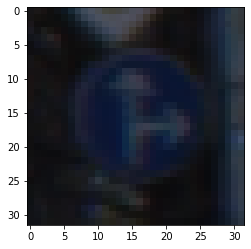

In [12]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

37

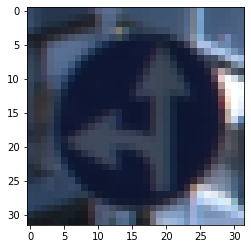

In [13]:
i = 5009
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

17

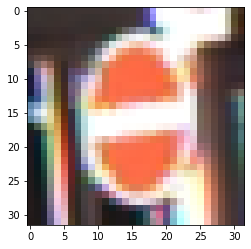

In [14]:
i = 4000
plt.imshow(X_validation[i]) # Show images are not shuffled
y_validation[i]

7

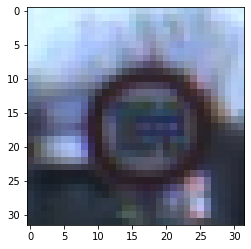

In [15]:
i = 3000
plt.imshow(X_validation[i]) # Show images are not shuffled
y_validation[i]

11

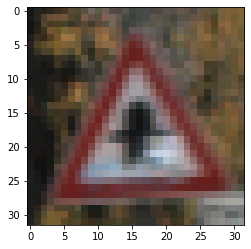

In [16]:
i = 3000
plt.imshow(X_test[i]) # Show images are not shuffled
y_test[i]

# Data Preparation

In [17]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [18]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [19]:
X_train_gray.shape # now 1 channel

(34799, 32, 32, 1)

In [20]:
X_train_gray

array([[[[123.33333333],
         [129.66666667],
         [134.        ],
         ...,
         [130.66666667],
         [142.        ],
         [145.33333333]],

        [[158.        ],
         [123.        ],
         [ 99.66666667],
         ...,
         [173.33333333],
         [183.        ],
         [178.33333333]],

        [[166.66666667],
         [115.        ],
         [115.        ],
         ...,
         [114.66666667],
         [118.66666667],
         [117.33333333]],

        ...,

        [[182.        ],
         [187.66666667],
         [193.66666667],
         ...,
         [ 96.33333333],
         [ 92.        ],
         [ 78.        ]],

        [[198.33333333],
         [200.        ],
         [181.        ],
         ...,
         [ 72.33333333],
         [ 78.33333333],
         [ 77.        ]],

        [[224.66666667],
         [219.        ],
         [218.33333333],
         ...,
         [ 61.33333333],
         [ 55.66666667],
         [ 57.   

In [21]:
# Normalisation
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [22]:
X_train_gray_norm # value bw (0 - 1)

array([[[[-0.03645833],
         [ 0.01302083],
         [ 0.046875  ],
         ...,
         [ 0.02083333],
         [ 0.109375  ],
         [ 0.13541667]],

        [[ 0.234375  ],
         [-0.0390625 ],
         [-0.22135417],
         ...,
         [ 0.35416667],
         [ 0.4296875 ],
         [ 0.39322917]],

        [[ 0.30208333],
         [-0.1015625 ],
         [-0.1015625 ],
         ...,
         [-0.10416667],
         [-0.07291667],
         [-0.08333333]],

        ...,

        [[ 0.421875  ],
         [ 0.46614583],
         [ 0.51302083],
         ...,
         [-0.24739583],
         [-0.28125   ],
         [-0.390625  ]],

        [[ 0.54947917],
         [ 0.5625    ],
         [ 0.4140625 ],
         ...,
         [-0.43489583],
         [-0.38802083],
         [-0.3984375 ]],

        [[ 0.75520833],
         [ 0.7109375 ],
         [ 0.70572917],
         ...,
         [-0.52083333],
         [-0.56510417],
         [-0.5546875 ]]],


       [[[-0.71354167],


<Figure size 432x288 with 0 Axes>

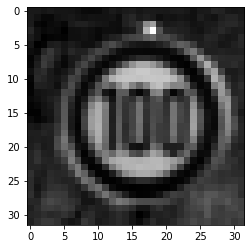

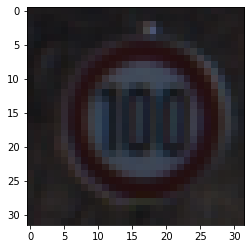

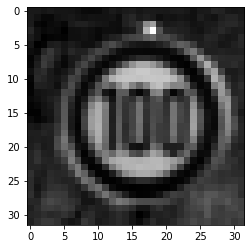

<Figure size 432x288 with 0 Axes>

In [23]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
plt.figure()

# Model Training

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [25]:
image_shape = X_train_gray[i].shape

In [26]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [27]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [28]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=30,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 10s 296us/step - loss: 3.0936 - accuracy: 0.2036 - val_loss: 2.5543 - val_accuracy: 0.3152
Epoch 2/30
34799/34799 [==============================] - 6s 185us/step - loss: 1.6211 - accuracy: 0.5404 - val_loss: 1.4741 - val_accuracy: 0.5667
Epoch 3/30
34799/34799 [==============================] - 7s 203us/step - loss: 0.9934 - accuracy: 0.7168 - val_loss: 1.0846 - val_accuracy: 0.6751
Epoch 4/30
34799/34799 [==============================] - 9s 246us/step - loss: 0.7333 - accuracy: 0.7947 - val_loss: 0.9240 - val_accuracy: 0.7351
Epoch 5/30
34799/34799 [==============================] - 8s 223us/step - loss: 0.5832 - accuracy: 0.8381 - val_loss: 0.8216 - val_accuracy: 0.7635
Epoch 6/30
34799/34799 [==============================] - 8s 228us/step - loss: 0.4729 - accuracy: 0.8715 - val_loss: 0.7936 - val_accuracy: 0.7800
Epoch 7/30
34799/34799 [==============================] - 8s 2

# Model Evaluation

In [29]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8700


In [30]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

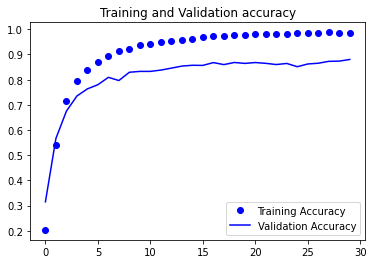

In [33]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


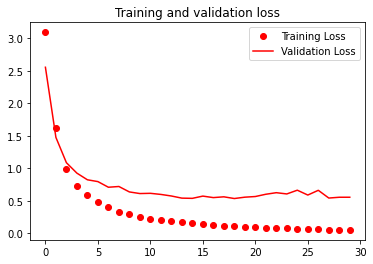

In [34]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


<AxesSubplot:>

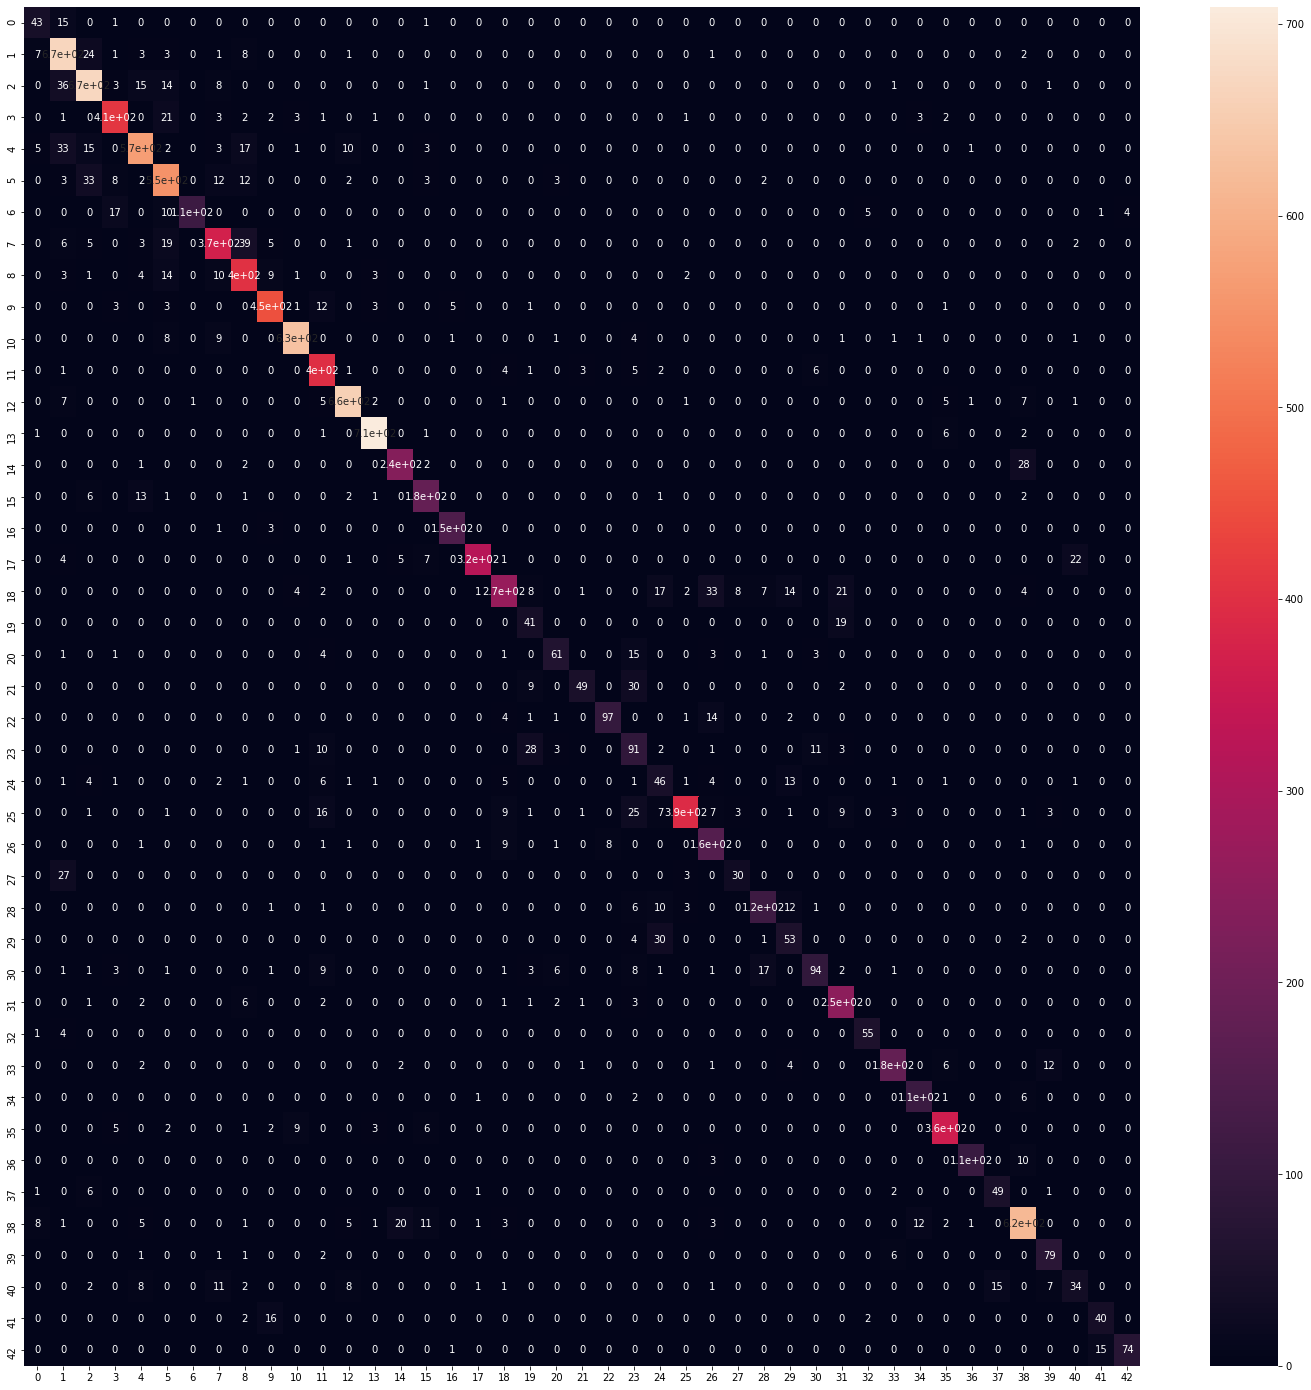

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)